## 3) Video Segmentation
### A colour histogram h(.) can be generated by counting how many times each colour occurs in an image. Histogram intersection can be used to match a pair of histograms. Given a pair of histograms, e.g., of an input image I and a model M, each containing n bins, the intersection of the histograms is defined as ∑n j=1 min[h(Ij), h(Mj)].

In [ ]:
#imports
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#reading in video & saving frames
"""
vid = cv2.VideoCapture('DatasetB.avi')
success,image = vid.read()
count = 000
while success:
  if count < 10: 
    cv2.imwrite("00%d_frame.jpg" % count, image)
    success,image = vid.read()
    count += 1
  if count < 100:
    cv2.imwrite("0%d_frame.jpg" % count, image)
    success,image = vid.read()
    count += 1
  else:
    cv2.imwrite("%d_frame.jpg" % count, image)
    success,image = vid.read()
    count += 1
"""

'\nvid = cv2.VideoCapture(\'DatasetB.avi\')\nsuccess,image = vid.read()\ncount = 000\nwhile success:\n  if count < 10: \n    cv2.imwrite("00%d_frame.jpg" % count, image)\n    success,image = vid.read()\n    count += 1\n  if count < 100:\n    cv2.imwrite("0%d_frame.jpg" % count, image)\n    success,image = vid.read()\n    count += 1\n  else:\n    cv2.imwrite("%d_frame.jpg" % count, image)\n    success,image = vid.read()\n    count += 1\n'

##### A) Write a histogram function that returns the colour histogram of an input image. Visualize the histogram and save the corresponding figure. For a given video sequence, use the above function to construct the histogram of each frame.

In [ ]:
#colour histogram
#https://www.youtube.com/watch?v=tUs7Glv7lpA&ab_channel=AbubakrShafique

#histogram function
#https://www.youtube.com/watch?v=OpTwGLVCtHQ&ab_channel=RealPython

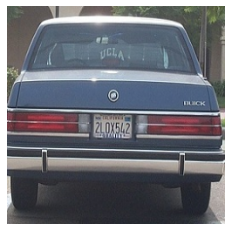

In [ ]:
#reading in an image to test with
img = cv2.imread("car-1.jpg")
plt.axis('off')
img = img[:,:,::-1]
img = cv2.resize(img, (250,250))
#here we need all three colour channels to be able to draw the histogram, so we won't convert it to greyscale
#img = np.dot(img[...,:3], [0.3, 0.59, 0.11]) 
plt.imshow(img)

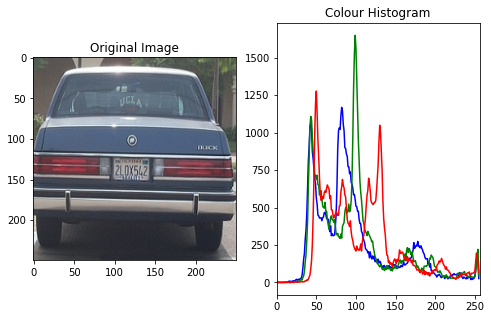

In [ ]:
#as learned in ICV lectures, every image is made out of pixels
#and an image has 3 colour channels, referring to red, green and blue 
#each channel has a value from 0 to 255, to encode the light levels of the colour
#all together, the values of each light level for each colour channel will combine to make one colour
#for example, 'sage green' (with a hex code of #B2AC88) is made up of R:178, G:172 & B:136

#similar to q 1 & 2, i'll make an empty canvas to map calculations on to
#this time, ill make an array filled with zeros that has the shape (256, 3)
#(255+1 = 256 (to avoid 'IndexError: index 255 is out of bounds for axis 0 with size 255'))
#to count the pixel intensity of each channel
rgbIntensities = np.zeros([256, 3])

#next, i will need a forloop to get each pixel intensity at each channel from the image i have read in and populate empty histogram array
#height
for i in range(0, img.shape[0]):
  #width
  for j in range(0, img.shape[1]):
    #colour channel
    for k in range(0, img.shape[2]):
      #count every time the intensity was found in the image
      rgbIntensities[img[i,j,k],k] += 1

#print(rgbIntensities.shape)

#now we can plot the histogram of the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
plt.xlim([0, 256])
ax1.set_title('Original Image')
ax1.imshow(img)
ax2.set_title('Colour Histogram')
ax2.plot(rgbIntensities[:,0], 'b')
ax2.plot(rgbIntensities[:,1], 'g')
ax2.plot(rgbIntensities[:,2], 'r')

#saving the histogram for the image
plt.savefig('car-1-histogram.jpg')

<BarContainer object of 256 artists>

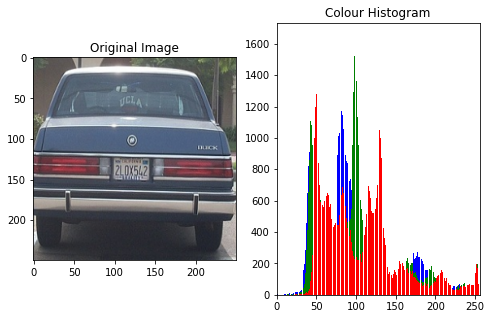

In [ ]:
#figuring out how to plot as bar
rgbIntensities = np.zeros([256, 3])

for i in range(0, img.shape[0]):
  for j in range(0, img.shape[1]):
    for k in range(0, img.shape[2]):
      rgbIntensities[img[i,j,k],k] += 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
plt.xlim([0, 256])
ax1.set_title('Original Image')
ax1.imshow(img)
ax2.set_title('Colour Histogram')
x = list(range(0, 256))
ax2.bar(x, rgbIntensities[:,0], color='blue')
ax2.bar(x, rgbIntensities[:,1], color='green')
ax2.bar(x, rgbIntensities[:,2], color='red')

In [ ]:
#testing on a plain colour image to check I understand the colour channel placement
"""
img = cv2.imread("blue.jpg")
img = img[:,:,::-1]
img = cv2.resize(img, (250,250))

rgbIntensities = np.zeros([256, 3])

for i in range(0, img.shape[0]):
  for j in range(0, img.shape[1]):
    for k in range(0, img.shape[2]):
      rgbIntensities[img[i,j,k],k] += 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
ax1.set_title('Original Image')
ax1.imshow(img)
ax2.set_title('Colour Histogram')
x = list(range(0, 256))
ax2.plot(rgbIntensities[:,0], color='blue')
ax2.plot(rgbIntensities[:,1], color='green')
ax2.plot(rgbIntensities[:,2], color='red')
"""

'\nimg = cv2.imread("blue.jpg")\nimg = img[:,:,::-1]\nimg = cv2.resize(img, (250,250))\n\nrgbIntensities = np.zeros([256, 3])\n\nfor i in range(0, img.shape[0]):\n  for j in range(0, img.shape[1]):\n    for k in range(0, img.shape[2]):\n      rgbIntensities[img[i,j,k],k] += 1\n\nfig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))\nax1.set_title(\'Original Image\')\nax1.imshow(img)\nax2.set_title(\'Colour Histogram\')\nx = list(range(0, 256))\nax2.plot(rgbIntensities[:,0], color=\'blue\')\nax2.plot(rgbIntensities[:,1], color=\'green\')\nax2.plot(rgbIntensities[:,2], color=\'red\')\n'

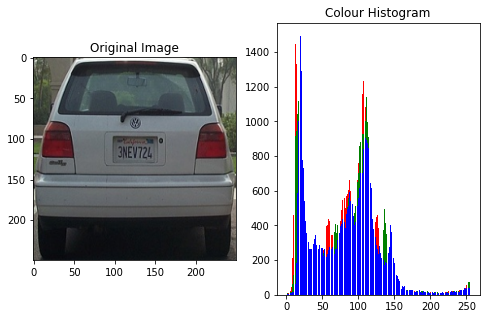

In [ ]:
#cv reads an image in as BGR, but when displaying the image i converted it to RGB
#but i forgot this when creating the histogram so i must change the colours of the lines being displayed
#testing on a second image with fixed colour channels
img = cv2.imread("car-2.jpg")
img = img[:,:,::-1]
img = cv2.resize(img, (250,250))

rgbIntensities = np.zeros([256, 3])

for i in range(0, img.shape[0]):
  for j in range(0, img.shape[1]):
    for k in range(0, img.shape[2]):
      rgbIntensities[img[i,j,k],k] += 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
ax1.set_title('Original Image')
ax1.imshow(img)
ax2.set_title('Colour Histogram')
x = list(range(0, 256))
ax2.bar(x, rgbIntensities[:,0], color='red')
ax2.bar(x, rgbIntensities[:,1], color='green')
ax2.bar(x, rgbIntensities[:,2], color='blue')
plt.savefig('car-2-histogram.jpg')

In [ ]:
#creating a function out of working out
def ICV_buildHistogram(image):
  #creating a array of zeros in the shape of 3x256 that will be populated with the pixel intensity of each channel
  #image = image[:,:,::-1]
  colourHistogram = np.zeros([256, 3])

  #forloop to get each pixel intensity at each channel from the image input and populate empty array
  #height
  for x in range(0, image.shape[0]):
    #width
    for y in range(0, image.shape[1]):
      #colour channel
      for z in range(0, image.shape[2]):
        #count every time the intensity was found in the image
        colourHistogram[image[x,y,z],z] += 1

  return colourHistogram

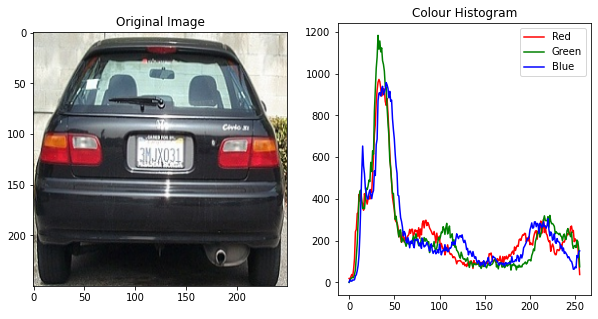

In [ ]:
#testing the function
img = cv2.imread("car-3.jpg")
img = img[:,:,::-1]
img = cv2.resize(img, (250,250))

#plotting the histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.set_title('Original Image')
ax1.imshow(img)
carhist = ICV_buildHistogram(img)
ax2.set_title('Colour Histogram')
ax2.plot(carhist[:,0], 'r')
ax2.plot(carhist[:,1], 'g')
ax2.plot(carhist[:,2], 'b')
ax2.legend(['Red', 'Green', 'Blue'])
plt.savefig('car-3-histogram.jpg')

In [ ]:
officeFrames = []
officeHist = []
vid = cv2.VideoCapture('DatasetB.avi')
success = True
count = 0
while success:
  success, frame = vid.read()
  if success:
    frame = frame[:,:,::-1]
    officeFrames.append(frame)
    hist = ICV_buildHistogram(frame)
    officeHist.append(hist)
    plt.ioff()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.set_title('Original Image')
    ax1.imshow(frame)
    ax2.set_title('Colour Histogram')
    x = list(range(0, 256))
    ax2.plot(hist[:,0], 'r')
    ax2.plot(hist[:,1], 'g')
    ax2.plot(hist[:,2], 'b')
    ax2.legend(['Red', 'Green', 'Blue'])
    plt.savefig("ColourHistogram%d.jpg" % count)
    plt.close(fig)
    count += 1

#### B) Write a function that returns the value of the intersection of a pair of histograms. For a given video sequence, use the histogram intersection function to calculate the intersection between consecutive frames (e.g. between It and It+1, between It+1 and It+2 and so on). Find how to normalize the intersection. Does that change the results? Plot the intersection values over time and the normalised intersection values, and save the corresponding figures. Show and comment the figures in the report.

In [ ]:
#https://stackoverflow.com/questions/52184242/numpy-calculate-histogram-intersection
#https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html

#intersection = the area of the overlap between 2 histograms
#intersection also = ∑n j=1 min[h(Ij), h(Mj)].
#calculate intersection for each colour channel
#average the three intersection values
#this way we lose as little significant data as possible

#getting the reg channel arrays for the first two frames to test with
hist1 = officeHist[0]
hist2 = officeHist[1]
hits1r = hist1.T[0]
hist2r = hist2.T[0]

#using the given formula to get the intersection for the red channels for the first 2 frames
for i in range(256):
  redIntersection = np.sum(np.minimum(hits1r[i], hist2r[i]))

#duplicating for green & blue colour channels
hits1g = hist1.T[1]
hist2g = hist2.T[1]
for i in range(256):
  greenIntersection = np.sum(np.minimum(hits1g[i], hist2g[i]))

hits1b = hist1.T[2]
hist2b = hist2.T[2]
for i in range(256):
  blueIntersection = np.sum(np.minimum(hits1b[i], hist2b[i]))

frameIntersection = (redIntersection + greenIntersection + blueIntersection) / 3
frameIntersection

3.6666666666666665

In [ ]:
hist1 = officeHist[0]
hist2 = officeHist[0]
hits1r = hist1.T[0]
hist2r = hist2.T[0]

#i feel like there is meant to be more of an intersection
redIntersection = np.sum(np.minimum(hits1r, hist2r))

#duplicating for green & blue colour channels
hits1g = hist1.T[1]
hist2g = hist2.T[1]
greenIntersection = np.sum(np.minimum(hits1g, hist2g))

hits1b = hist1.T[2]
hist2b = hist2.T[2]
blueIntersection = np.sum(np.minimum(hits1b, hist2b))

frameIntersection = (redIntersection + greenIntersection + blueIntersection) / 3
frameIntersection

75264.0

In [ ]:
#getting the reg channel arrays for the first two frames to test with
hist1 = officeHist[0]
hist2 = officeHist[0]
hits1r = hist1.T[0]
hist2r = hist2.T[0]

#using the given formula to get the intersection for the red channels for the first 2 frames
for i in range(256):
  redIntersection = np.sum(np.minimum(hits1r[i], (hist2r * i)))

#duplicating for green & blue colour channels
hits1g = hist1.T[1]
hist2g = hist2.T[1]
for i in range(256):
  greenIntersection = np.sum(np.minimum(hits1g[i], (hist2g * i)))

hits1b = hist1.T[2]
hist2b = hist2.T[2]
for i in range(256):
  blueIntersection = np.sum(np.minimum(hits1b[i], (hist2b * i)))

frameIntersection = (redIntersection + greenIntersection + blueIntersection) / 3
frameIntersection

887.3333333333334

In [ ]:
def ICV_calculateIntersection(histogram1, histogram2):
  #identifying colour channel arrays for each histogram
  histogram1r = histogram1.T[0]
  histogram1g = histogram1.T[1]
  histogram1b = histogram1.T[2]
  histogram2r = histogram2.T[0]
  histogram2g = histogram2.T[1]
  histogram2b = histogram2.T[2]

  for i in range(256):

    #intersectionValueCalc1
    #rIntersection = np.sum(np.minimum(histogram1r[i], histogram2r[i]))
    #gIntersection = np.sum(np.minimum(histogram1g[i], histogram2g[i]))
    #bIntersection = np.sum(np.minimum(histogram1b[i], histogram2b[i]))

    #intersectionValueCalc2
    rIntersection = np.sum(np.minimum(histogram1r, histogram2r))
    gIntersection = np.sum(np.minimum(histogram1g, histogram2g))
    bIntersection = np.sum(np.minimum(histogram1b, histogram2b))

    #intersectionValueCalc3
    #rIntersection = np.sum(np.minimum(histogram1r[i], (histogram2r * i)))
    #gIntersection = np.sum(np.minimum(histogram1g[i], (histogram2g * i)))
    #bIntersection = np.sum(np.minimum(histogram1b[i], (histogram2b * i)))

  avgIntersection = ((rIntersection + gIntersection + bIntersection) / 3)

  return round(avgIntersection, 3)

In [ ]:
officeFrames = []
officeHist = []
intersectionValues = []
currentFrame = 0
nextFrame = 1

vid = cv2.VideoCapture('DatasetB.avi')
success = True
count = 0
while success:
  success, img = vid.read()
  if success:
    img = img[:,:,::-1]
    officeFrames.append(img)
    hist = ICV_buildHistogram(img)
    officeHist.append(hist)
    count += 1
while nextFrame < len(officeHist):
  intersection = ICV_calculateIntersection(officeHist[currentFrame], officeHist[nextFrame])
  intersectionValues.append(intersection)
  currentFrame += 1
  nextFrame += 1

print(len(intersectionValues))
#intersectionValues

347


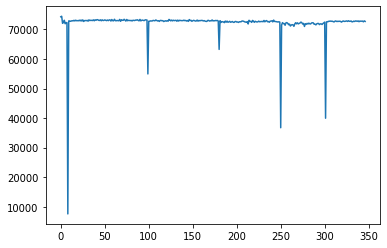

In [ ]:
plt.plot(intersectionValues)

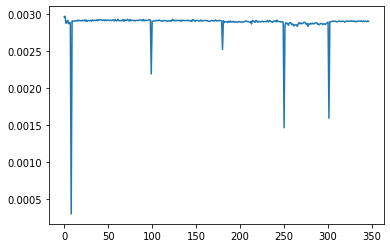

In [ ]:
#to normalise the data, we want to weight the values in the list in comparison to all the other values in the list
#to do this, we want to divide every intersection value by the sum of all intersection values 

normalisedIntersectionValues = []

for i in intersectionValues:
  norm = (i/ sum(intersectionValues))
  #norm = (i - min(intersectionValues)) / (max(intersectionValues) - min(intersectionValues))
  normalisedIntersectionValues.append(norm)

plt.plot(normalisedIntersectionValues)

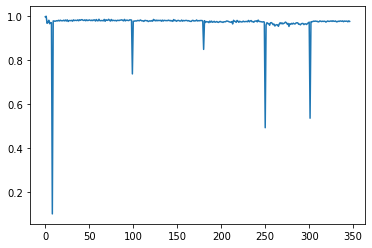

In [ ]:
#using the max value instead of the sum to normalise makes the values all between 0 and 1 instead of all add up to 1 (like when using sum)
#creating an array to save the normalised value of each intersection value
normalisedIntersectionValues = []
#for loop to perform the calculation on each value in the list of intersectionValues
for i in intersectionValues:
  #calculation to normalise the value
  norm = (i/ max(intersectionValues))
  #adding the normalised value to the list
  normalisedIntersectionValues.append(norm)
#plotting the normalised values 
plt.plot(normalisedIntersectionValues)

#### C) Discuss in the report the following: What does the intersection value represent for a given input video? Can you use it to make a decision about scene changes? How robust to changes in the video is the histogram intersection? When does it fail?

In [ ]:
#intersection value graph shows the change in colours between frames.
#we can see a corellation between peaks in the plot and the number of scene changes in the video.
#so we can use intersection values to a certain extent.
#for datasetB, it is successful in identifying the scene changes in an office but the third peak was much smaller than the other as the setting remains fairly the same despite there definitely being a scene change.
#in some videos, the scene may change quiet obviously to the human eye, but the frame/image it self may have very similar colours to the frame in the scene prior
#which a computer may have a hard time differentiating.
###WERENT MEANT TO USE DATASET C BUT FIND A WAY TO RELATE THIS IN###
#datasetC is a good example of representing how the histogram intersection fails to identify scenes
#in this video, we have a recording of cars on a road - there are no scene changes but the histogram intersection plot 
#peaks every time new car appears on screen - as it is large when it enters the frame, providing a distinct colour to the image,
#but as the car gets futher away, it gets smaller and it's colour takes up less of the screen - blending in with the background colours
#so the algorithm thinks it is a scene change when in reality, it is identifying the presence of a newe opject on screen.
#therefore, as scene change detection, the algorithm fails in this case
#but succeeds as object detection for this dataset